In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.modeling import models, fitting
from photutils import isophote, aperture_photometry
from photutils import CircularAperture, EllipticalAperture, EllipticalAnnulus
from photutils.isophote import EllipseGeometry, Ellipse
import ipywidgets
from luminosity import surface_brightness

In [2]:
def plot_angmom(snap, ax):
    """Plot the projected angular momentum on the map on `ax`, after having
    normalized it to one. It means that short arrows plotted means L almost
    aligned with line-of-sight-direction."""
    L = pynbody.analysis.angmom.ang_mom_vec(snap)
    print("L:", L)
    norm = np.linalg.norm(L)
    ax.arrow(0, 0, L[0]/norm, L[1]/norm, head_width=0.2, head_length=.2, color='red');

In [3]:
from pynbody.configuration import config_parser

In [4]:
# pynbody.config['sph']['smooth-particles'] = 64

In [5]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

In [6]:
s.properties

{'time': Unit("1.34e+01 s kpc km**-1")}

In [7]:
s.properties['time']._scale

13.4303491432

In [8]:
s.header.time

13.4303491432

In [9]:
s.properties['time'].in_units('Gyr')

13.132382761798997

In [10]:
s.header.time*0.9785

13.141596636621202

In [11]:
pynbody.analysis.luminosity.halo_mag(s.s, band='v')

SimArray(-17.41188933)

From Robbert's thesis, page 45:
_This observationally motivated analysis is something that I made a significant contribution to and will prove to be of crucial importance throughout this work. The galaxy luminosities are now determined by fitting an exponential function to a simulated galaxy’s surface brightness profiles out to R$_{30}$, the point where the surface brightness drops to 30 mag arcsec$^{-2}$, and extrapolating it to infinity to estimate the total luminosity. The V-band half-light radius R$_e$ was determined from this fitted profile. M$_\star$ is estimated from the V and I-band luminosities (Bell & de Jong, 2001)_

In [12]:
max_boxsize = 4000

In [13]:
s.properties['boxsize'] = pynbody.units.Unit("{} kpc".format(max_boxsize))

In [14]:
width = 10
resolution = 500

In [15]:
pynbody.analysis.halo.center(s.g)#, vel=False)
# subsnap = s[pynbody.filt.Cuboid('{} kpc'.format(-width*1.1))]

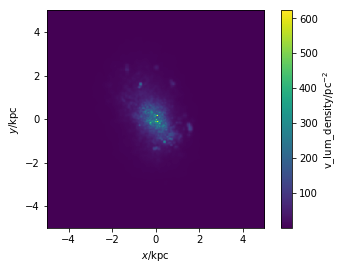

In [16]:
fig, ax = plt.subplots()
band='v'
lum_density_name = band + '_lum_density'
sun_abs_mag = {'u':5.56,'b':5.45,'v':4.8,'r':4.46,'i':4.1,'j':3.66,'h':3.32,'k':3.28}[band]
s.s[lum_density_name] = (10 ** (-0.4 * (s.s[band + "_mag"] - sun_abs_mag))) * s.s['rho'] / s.s['mass']

s.s[lum_density_name].units = s.s['rho'].units/s.s['mass'].units

pynbody.plot.sph.image(s.s, qty=lum_density_name, units='pc^-2',
                       noplot=False, width=width, resolution=resolution, log=False);

In [17]:
pynbody.analysis.luminosity.halo_mag(s.s,band='v')

SimArray(-17.41188933)

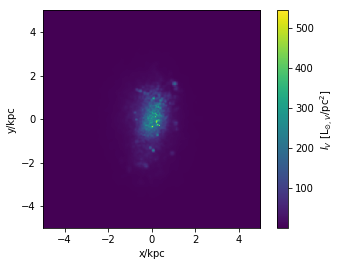

In [18]:
pynbody.analysis.angmom.sideon(s.s)
# subsnap.rotate_y(90)
fig, ax = plt.subplots()
sb = surface_brightness(s.s, width=width, resolution=resolution, lum_pc2=True, log=False,
                        mag_filter=None, subplot=ax)

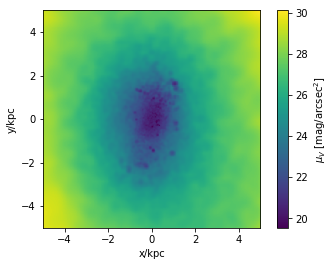

In [19]:
fig, ax = plt.subplots()
sb = surface_brightness(s.s, width=width, resolution=resolution, lum_pc2=False, log=False,
                        mag_filter=None, subplot=ax)

In [20]:
pynbody.analysis.luminosity.halo_mag(s)

SimArray(-17.41188933)

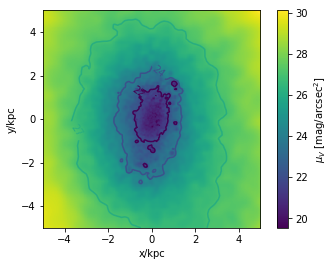

In [21]:
fig, ax = plt.subplots()
extent = (-width/2, width/2, -width/2, width/2)
sb = surface_brightness(s.s, width=width, resolution=resolution, lum_pc2=False, log=False, 
                        mag_filter=None, subplot=ax, contour=5)
L = pynbody.analysis.angmom.ang_mom_vec(s.s)
# plot_angmom(subsnap.s, ax)